In [230]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [231]:
class fuzzy(object):
    def __init__(self, n_points, maxepocas, learning_rate) -> None:
        super().__init__()

        self.n_points = n_points
        self.maxepocas = maxepocas
        self.learning_rate = learning_rate

    def run(self):
        self.init()

        x_values = np.linspace(-2, 2, self.n_points)

        aprox = np.zeros(self.n_points)
        error = 0.

        for i in range(self.maxepocas):
            if i % 100 == 0:
                self.plot(x_values, aprox, error, i)
            aprox, error = self.update(x_values, self.learning_rate, i)
        self.plot(x_values, aprox, error, self.maxepocas)

    def init(self):
        self.x_1  = np.random.rand()*4 -2
        self.x_2  = np.random.rand()*4 -2
        self.sig1 = np.random.rand()*4 -2
        self.sig2 = np.random.rand()*4 -2
        self.p1   = np.random.rand()*4 -2
        self.p2   = np.random.rand()*4 -2 
        self.q1   = np.random.rand()*4 -2
        self.q2   = np.random.rand()*4 -2

    def plot(self, x_values, aprox, error, epoca):

        # g1 = self.gaussian(x_values, self.x_1, self.sig1)
        # g2 = self.gaussian(x_values, self.x_2, self.sig2)

        # plt.plot(x_values, g1, label='G1')
        # plt.plot(x_values, g2, label='G2')

        plt.plot(x_values, np.power(x_values, 2), label='Objective')
        plt.plot(x_values, aprox, label='Aproximation')

        plt.title(f'Época: {epoca}\nAverage error: {error}')
        plt.legend()
        plt.show()

    def gaussian(self, x, x_, sigma):
      return np.exp((-1/2) * np.power((x - x_) / sigma, 2))

    def update(self, x_values, alpha, epoca):

        # Randomize indexes for x_values
        indice = np.arange(120)
        np.random.shuffle(indice)
        
        y = np.zeros(len(x_values))
        error = np.zeros(len(x_values))

        for i in indice:
          x = x_values[i]

          w1 = self.gaussian(x, self.x_1, self.sig1)

          w2 = self.gaussian(x, self.x_2, self.sig2)

          w1n = w1/(w1 + w2)

          w2n = w2/(w1 + w2)

          y1 = self.p1 * x + self.q1
          y2 = self.p2 * x + self.q2

          y[i] = w1n * y1 + w2n * y2

          yd = np.power(x, 2)

          error[i] = y[i] - yd

          # Calculate error's derivatives
          e_p1 = error[i] * w1n * x

          e_p2 = error[i] * w2n * x

          e_q1 = error[i] * w1n

          e_q2 = error[i] * w1n

          e_x_1 = error[i] * w2 * ((y1 - y2) / np.power(w1 + w2, 2)) * w1 * ((x - self.x_1) / np.power(self.sig1, 2))

          e_x_2 = error[i] * w1 * ((y2 - y1) / np.power(w1 + w2, 2)) * w2 * ((x - self.x_2) / np.power(self.sig2, 2))

          e_sig1 = error[i] * w2 * ((y1 - y2) / np.power(w1 + w2, 2)) * w1 * (np.power(x - self.x_1, 2) / np.power(self.sig1, 3))

          e_sig2 = error[i] * w1 * ((y2 - y1) / np.power(w1 + w2, 2)) * w2 * (np.power(x - self.x_2, 2) / np.power(self.sig2, 3))

          # Update parameters
          self.p1   = self.p1   - (alpha * e_p1)
          self.p2   = self.p2   - (alpha * e_p2)
          self.q1   = self.q1   - (alpha * e_q1)
          self.q2   = self.q2   - (alpha * e_q2)
          self.x_1  = self.x_1  - (alpha * e_x_1)
          self.x_2  = self.x_2  - (alpha * e_x_2)
          self.sig1 = self.sig1 - (alpha * e_sig1)
          self.sig2 = self.sig2 - (alpha * e_sig2)

        error_average = np.average(error)
        return y, error_average


# Execution

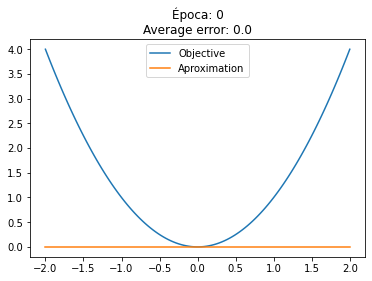

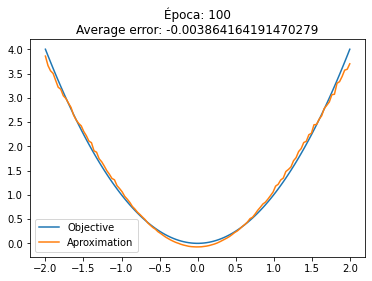

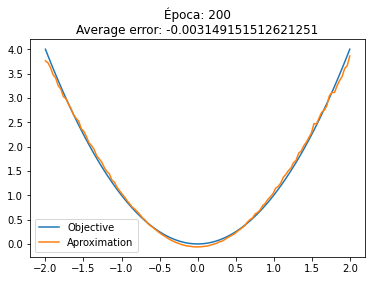

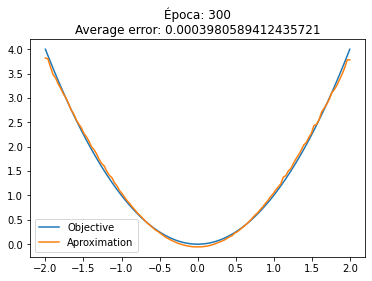

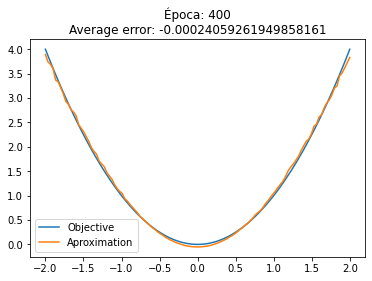

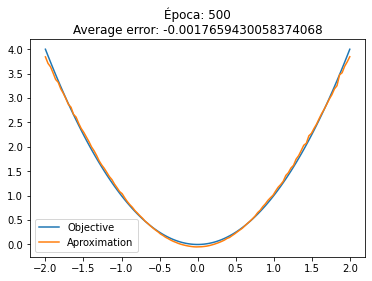

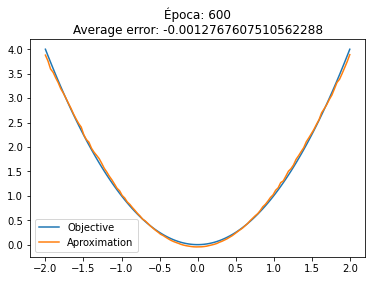

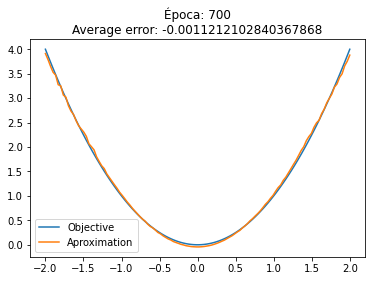

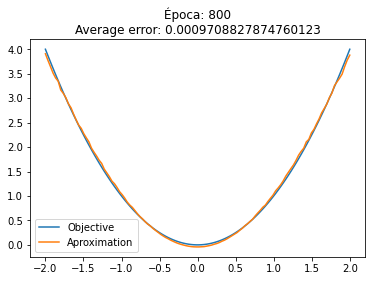

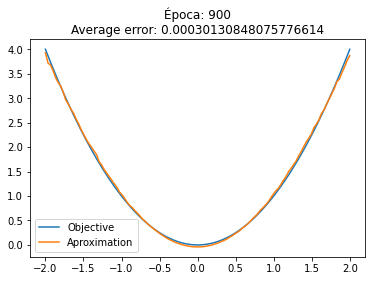

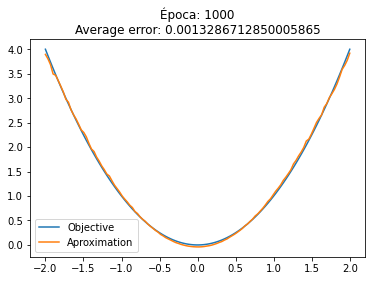

In [232]:
Fuzzy = fuzzy(120, 1000, 0.01)
Fuzzy.run()